## Worksheet 4
### Beginning to understand linear models

#### PART 0: loading any packages that you think you will need

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import Perceptron
from sklearn import preprocessing
import seaborn as sns

We will once again work with the Breast Cancer Wisconsin dataset. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

For more information, see https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)


1. Load the data from sklearn.datasets, as done before.

In [7]:
df1 = load_breast_cancer(as_frame=True)
X, y = df1.data, df1.target

dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

df.to_csv("./feoirjf.csv")

2. We will compare two classifiers: k-nearest neighbors, and the Perceptron. To this end:

    a) Create a random split of the data for training and validation.
    
    b) Fit both models to the training data (suggested parameters: k = 3 for kNN, and `penalty='l2'`, `alpha=1e-6`, `tol=1e-10` for perceptron).
    
    c) evaluate their accuracy on the held-out validation set.

To have a sense of uncertainty, repeat steps a-c 50 times, and plot the resulting distributions of accuracies accross these realizations (e.g., you can use boxplots).

Which classifier seems better?

<AxesSubplot:>

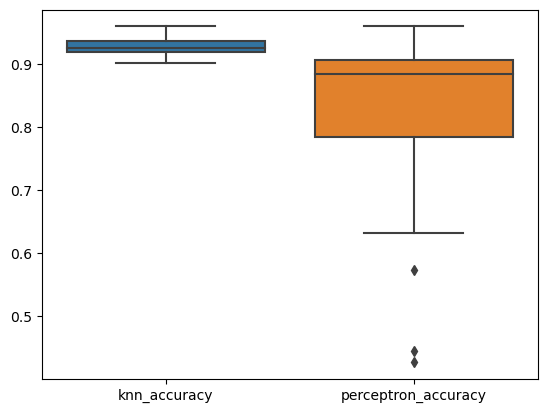

In [8]:
knn_accuracy = []
perceptron_accuracy = []

#knn
for n in range(0,49):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    model = knn(3)
    model.fit(X_train,y_train)
    knn_accuracy.append(model.score(X_test,y_test))

#perceptron
for ln in range(0,49):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    p = Perceptron(penalty='l2', alpha=1e-6, tol=1e-10)
    p.fit(X_train, y_train)
    perceptron_accuracy.append(p.score(X_test,y_test))

d = {'knn_accuracy': knn_accuracy, 'perceptron_accuracy': perceptron_accuracy}
df = pd.DataFrame(data=d)

sns.boxplot(data=df)

#knn seems to be better.


3. Did you look at the distribution of the data? Have a look at the marginal distributions of each feature, as well as the correlation between them, with the function `pairplot`, from the package `seaborn` (and read its description). Select only a few (say, 4-6 features) for this. Are the features in similar scales?

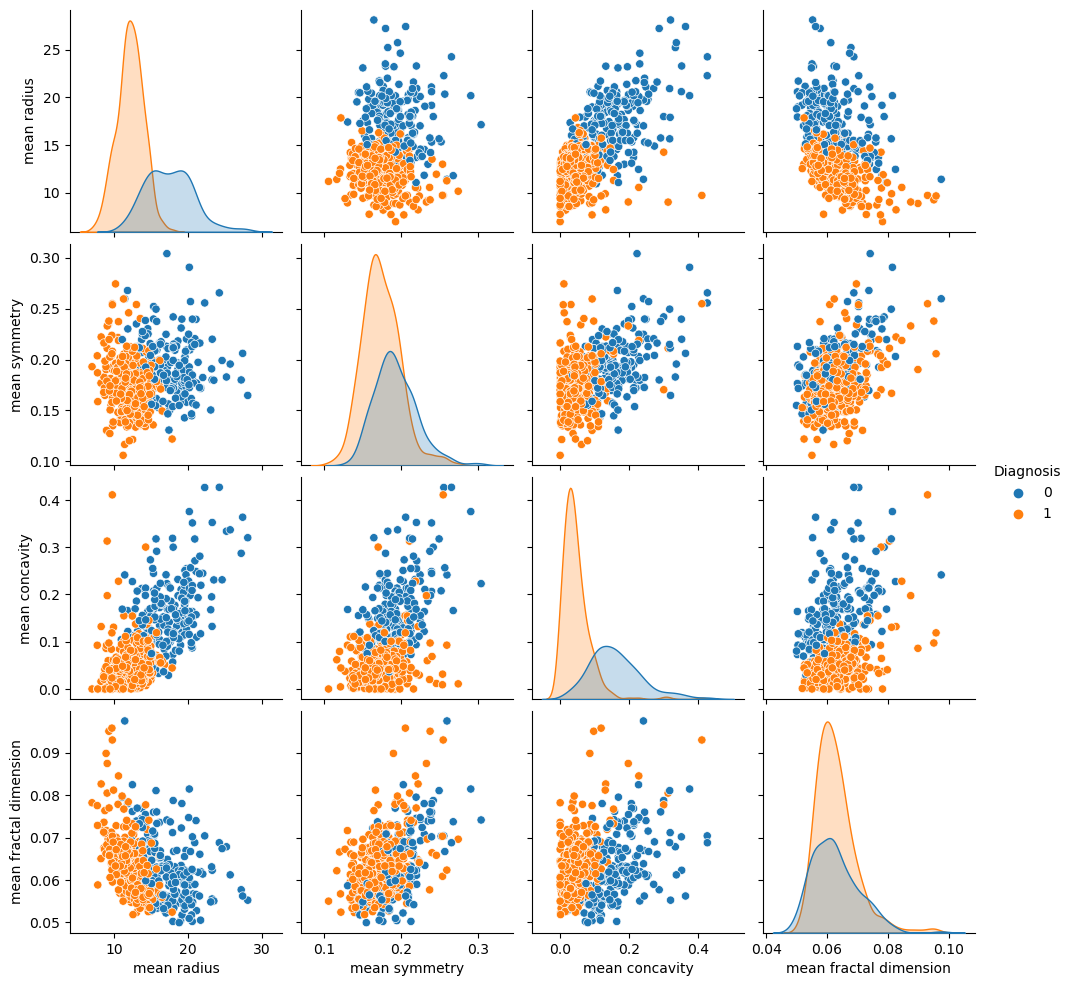

In [10]:
dfconfusion1 = load_breast_cancer(as_frame=True)
dfconfusion = pd.DataFrame(dfconfusion1.data, columns=dfconfusion1.feature_names)
dfconfusion['Diagnosis'] = pd.Series(dfconfusion1.target)


sns.pairplot(data=dfconfusion, vars=['mean radius', 'mean symmetry', 'mean concavity', 'mean fractal dimension'], hue="Diagnosis")
# dataset.feature_names

#No, some are in the order of 10, while others are in the order of 0.1

4. Very different ranges for the values of features is problematic for many learning algorithms. Repeat the question # 2 but now normalize the data beforehand. You can use the function `normalize` from `sklearn.preprocessing` (and read its description!). Which classifier is better now? Compute the statistics of the data as you did in question #3, but now for the normalized data. What has changed?

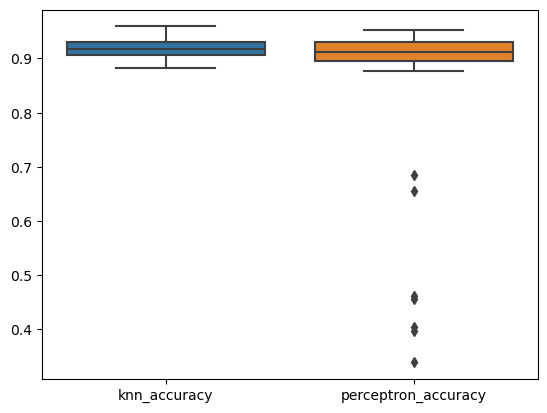

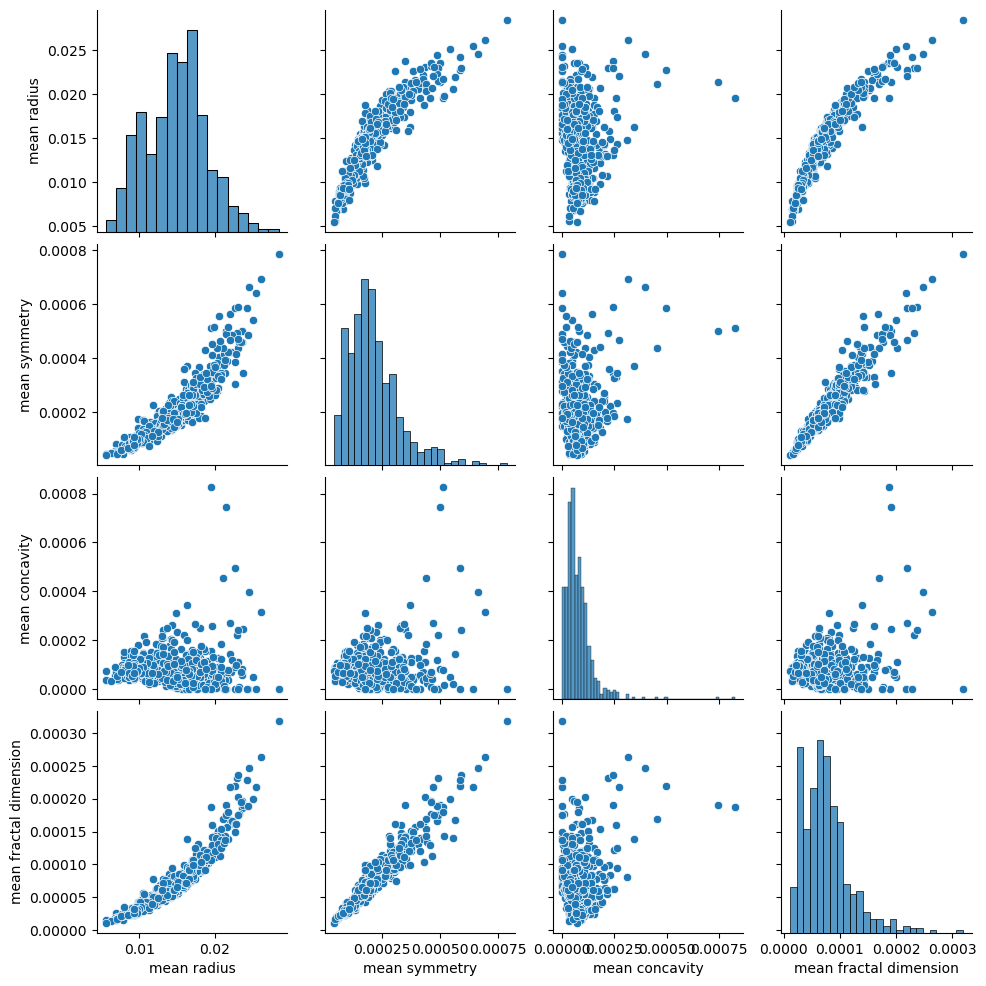

In [ ]:
knn_accuracy = []
perceptron_accuracy = []


X = preprocessing.normalize(X, norm='l2')
X = pd.DataFrame(X, columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area',        'mean smoothness', 'mean compactness', 'mean concavity',        'mean concave points', 'mean symmetry', 'mean fractal dimension',        'radius error', 'texture error', 'perimeter error', 'area error',        'smoothness error', 'compactness error', 'concavity error',        'concave points error', 'symmetry error', 'fractal dimension error',        'worst radius', 'worst texture', 'worst perimeter', 'worst area',        'worst smoothness', 'worst compactness', 'worst concavity',        'worst concave points', 'worst symmetry', 'worst fractal dimension'])

#knn
for n in range(0,49):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    model = knn(3)
    model.fit(X_train,y_train)
    knn_accuracy.append(model.score(X_test,y_test))

#perceptron
for ln in range(0,49):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    p = Perceptron(penalty='l2', alpha=1e-6, tol=1e-10)
    p.fit(X_train, y_train)
    perceptron_accuracy.append(p.score(X_test,y_test))

d = {'knn_accuracy': knn_accuracy, 'perceptron_accuracy': perceptron_accuracy}
df = pd.DataFrame(data=d)

sns.boxplot(data=df)

#knn still seems to be better

sns.pairplot(data=X, vars=['mean radius', 'mean symmetry', 'mean concavity', 'mean fractal dimension'])


#the relationships between the data seem to be the same.


5. **BONUS**: machine learning algorithms can be sensitive to corruptions on data. Repeat Question #2 (normalizing the data!) but at test time, simulate the contamination of data by adding some amount of Gaussian noise to the features. Evaluate how the accuracy deteriorates for both algorihms as you increase the amount of contamination

<AxesSubplot:>

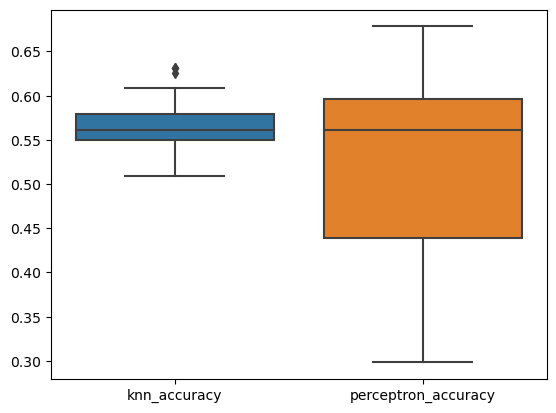

In [ ]:
df1 = load_breast_cancer(as_frame=True)
dataset = load_breast_cancer()
df12 = pd.DataFrame(dataset.data, columns=dataset.feature_names)

mu,sigma = 0,10000 #low and high
noise = np.random.randint(mu, sigma, [569,30])
df12_noise = df12 + noise

X, y = df12_noise, df1.target

knn_accuracy = []
perceptron_accuracy = []

X = preprocessing.normalize(X, norm='l2')
X = pd.DataFrame(X, columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area',        'mean smoothness', 'mean compactness', 'mean concavity',        'mean concave points', 'mean symmetry', 'mean fractal dimension',        'radius error', 'texture error', 'perimeter error', 'area error',        'smoothness error', 'compactness error', 'concavity error',        'concave points error', 'symmetry error', 'fractal dimension error',        'worst radius', 'worst texture', 'worst perimeter', 'worst area',        'worst smoothness', 'worst compactness', 'worst concavity',        'worst concave points', 'worst symmetry', 'worst fractal dimension'])


#knn
for n in range(0,49):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    model = knn(3)
    model.fit(X_train,y_train)
    knn_accuracy.append(model.score(X_test,y_test))

#perceptron
for ln in range(0,49):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    p = Perceptron(penalty='l2', alpha=1e-6, tol=1e-10)
    p.fit(X_train, y_train)
    perceptron_accuracy.append(p.score(X_test,y_test))

d = {'knn_accuracy': knn_accuracy, 'perceptron_accuracy': perceptron_accuracy}
df = pd.DataFrame(data=d)

sns.boxplot(data=df)
